## normal

### loss

In [96]:
from torch.nn import BCEWithLogitsLoss

In [98]:
img1 = torch.ones(1, 3, 2, 2) * 0.9
img2 = torch.ones(1, 3, 2, 2)

In [103]:
loss = BCEWithLogitsLoss(reduction="sum" if 1==2 else "none")
loss(img1,img2)

tensor([[[[0.3412, 0.3412],
          [0.3412, 0.3412]],

         [[0.3412, 0.3412],
          [0.3412, 0.3412]],

         [[0.3412, 0.3412],
          [0.3412, 0.3412]]]])

### cv2.imread

In [113]:

import cv2

In [114]:
img1 = "D:/DATASETS/ISPRS/ChangeDetectionDataset/Real/subset/train/A/00001.jpg"
img2 = "D:/DATASETS/ISPRS/ChangeDetectionDataset/Real/subset/train/B/00001.jpg"
gt = "D:/DATASETS/ISPRS/ChangeDetectionDataset/Real/subset/train/OUT/00001.jpg"

In [115]:
gt = cv2.imread(gt)
img2 = cv2.imread(img2)
img1 = cv2.imread(img1)

In [117]:
gt = gt[:,:,0:1]

## datamaker

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.datamaker import img_to_dataset

In [9]:
dataset_A = []
for root,dirs,files in os.walk("data/data/A/"):
    for file in files:
        img_path = os.path.join(root,file)
        dataset_A += img_to_dataset(img_path,56,[0,784],[0,448],channel=3)

In [10]:
dataset_B = []
for root,dirs,files in os.walk("data/data/B/"):
    for file in files:
        img_path = os.path.join(root,file)
        dataset_B += img_to_dataset(img_path,56,[0,784],[0,448],channel=3)

In [11]:
dataset_gt = []
for root,dirs,files in os.walk("data/data/gt/"):
    for file in files:
        img_path = os.path.join(root,file)
        dataset_gt += img_to_dataset(img_path,56,[0,784],[0,448],channel=3)

In [12]:
train = pd.DataFrame(columns=['img1', 'img2', 'gt', 'p_change'])
test = pd.DataFrame(columns=['img1', 'img2', 'gt', 'p_change'])

for sar,opt,gt in zip(dataset_A,dataset_B,dataset_gt):
    change,unchange = (gt['img']==255).sum(),(gt['img']==0).sum()
    p_change = change/(change+unchange)
    if sar['type'] == 'train':
        train.loc[train.shape[0]] = sar['path'],opt['path'],gt['path'],p_change
    else:
        test.loc[test.shape[0]] = sar['path'],opt['path'],gt['path'],p_change

train.to_csv("data/data/train.csv",index=False)
test.to_csv("data/data/test.csv",index=False)

## transorms

In [1]:
import matplotlib.pylab as plt
from data.normal import Normal
import cv2
import random
import pandas as pd

In [2]:
test_csv = pd.read_csv("data/Szada/train.csv")
test = Normal(csv_path="data/Szada/train.csv")

193


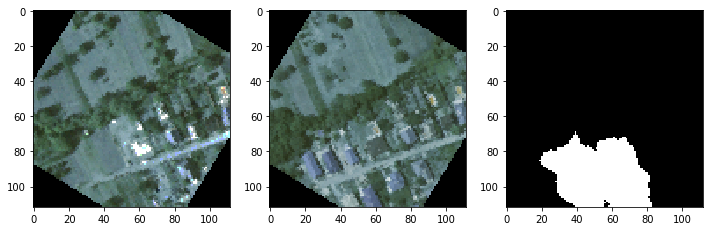

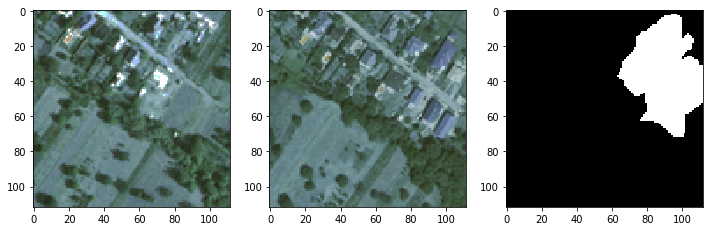

In [4]:
n = random.randint(1,200)
print(n)
a,b,c = test.__getitem__(n)
aa,bb,cc = [cv2.imread(test_csv.loc[n,"img1"]),cv2.imread(test_csv.loc[n,"img2"]),cv2.imread(test_csv.loc[n,"gt"])]
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(a.transpose(0,2).transpose(0,1))
plt.subplot(132)
plt.imshow(b.transpose(0,2).transpose(0,1))
# plt.imshow((a-b).transpose(0,2))
plt.subplot(133)
plt.imshow(c[1,:,:],cmap="gray")
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(aa)
plt.subplot(132)
plt.imshow(bb)
# plt.imshow((a-b).transpose(0,2))
plt.subplot(133)
plt.imshow(cc)

## Test

In [2]:
!python eval_net.py -cfg configs/homo/szada_siamese_unet_conc.yaml EVAL.SAVE_IMAGES True